In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/vturino/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# dyn_name = "dynamic_ocean_sed_geometric_nosedcut_strongOPC_box100km_max7.5e22"
# kin_name = "kinematic_basalt2.5_quartz1_resplugin_strongOPC"
dyn_name = "ocean_continent_subduction_fields_longSP_visc24"
cttV_name = "kinematic_mu0.13_basalt7.5km_sed1km_cttV"
Vto50pc_name = "kinematic_mu0.13_basalt7.5km_sed1km_Vto50pc"
Vto10pc_name = "kinematic_mu0.13_basalt7.5km_sed1km_Vto10pc"
Vto0pc_name = "kinematic_mu0.13_basalt7.5km_sed1km_Vto0"
dyn_loc = f"/home/vturino/PhD/projects/exhumation/plots/single_models/{dyn_name}/txt_files"
cttV_loc = f"/home/vturino/PhD/projects/exhumation/plots/single_models/{cttV_name}/txt_files"
Vto50pc_loc = f"/home/vturino/PhD/projects/exhumation/plots/single_models/{Vto50pc_name}/txt_files"
Vto10pc_loc = f"/home/vturino/PhD/projects/exhumation/plots/single_models/{Vto10pc_name}/txt_files"
Vto0pc_loc = f"/home/vturino/PhD/projects/exhumation/plots/single_models/{Vto0pc_name}/txt_files"

dyn = pd.read_csv(f'{dyn_loc}/2D_v.txt', delim_whitespace=True)
cttV = pd.read_csv(f'{cttV_loc}/2D_v.txt', delim_whitespace=True)
Vto50pc = pd.read_csv(f'{Vto50pc_loc}/2D_v.txt', delim_whitespace=True)
Vto10pc = pd.read_csv(f'{Vto10pc_loc}/2D_v.txt', delim_whitespace=True)
Vto0pc = pd.read_csv(f'{Vto0pc_loc}/2D_v.txt', delim_whitespace=True)

cttV.conv_rate[0]    = np.nan
cttV.SP[0] = np.nan
cttV.OP[0] = np.nan
Vto50pc.conv_rate[0] = np.nan
Vto50pc.SP[0] = np.nan
Vto50pc.OP[0] = np.nan
Vto10pc.conv_rate[0] = np.nan
Vto10pc.SP[0] = np.nan
Vto10pc.OP[0] = np.nan
Vto0pc.conv_rate[0] = np.nan
Vto0pc.SP[0] = np.nan
Vto0pc.OP[0] = np.nan
dyn.conv_rate[0] = np.nan
dyn.SP[0] = np.nan
dyn.OP[0] = np.nan
dyn.conv_rate[71:] = np.nan


# kin_oce_name = "kinematic_mu0.025_velocity_to_0cmyr"
# kin_oce_loc = f"/home/vturino/PhD/projects/exhumation/plots/single_models/{kin_oce_name}/txt_files"
# kin_oce = pd.read_csv(f'{kin_oce_loc}/2D_v.txt', delim_whitespace=True)
# kin_oce.SP[0] = np.nan
# kin_oce.conv_rate[0] = np.nan
# kin_oce.OP[0] = np.nan

/tmp/ipykernel_3649085/2572002049.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dyn = pd.read_csv(f'{dyn_loc}/2D_v.txt', delim_whitespace=True)
/tmp/ipykernel_3649085/2572002049.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cttV = pd.read_csv(f'{cttV_loc}/2D_v.txt', delim_whitespace=True)
/tmp/ipykernel_3649085/2572002049.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Vto50pc = pd.read_csv(f'{Vto50pc_loc}/2D_v.txt', delim_whitespace=True)
/tmp/ipykernel_3649085/2572002049.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Vto10pc = pd.read_csv(f'{Vto10pc_loc}/2D_v.txt', delim_whi

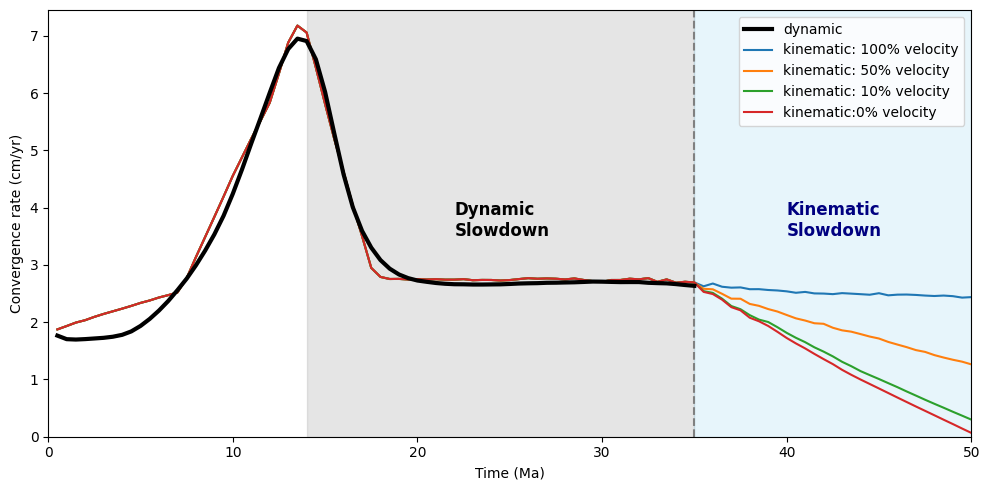

In [29]:
fig = plt.figure(figsize=(10, 5))
plt.plot(dyn.time/1e6, dyn.conv_rate, label='dynamic', zorder = 20, color = 'k', linewidth = 3)
plt.plot(cttV.time/1e6, cttV.conv_rate, label='kinematic: 100% velocity')
plt.plot(Vto50pc.time/1e6, Vto50pc.conv_rate, label='kinematic: 50% velocity', zorder = 10)
plt.plot(Vto10pc.time/1e6, Vto10pc.conv_rate, label='kinematic: 10% velocity', zorder = 10)
plt.plot(Vto0pc.time/1e6, Vto0pc.conv_rate, label='kinematic:0% velocity', zorder = 10)
plt.axvline(x=35.0, color = 'grey', linestyle = "--")

#plot rectangle between x = 14 and x = 35
plt.axvspan(14, 35, alpha=0.2, color='grey')
plt.text(22, 3.5, 'Dynamic\nSlowdown', fontsize=12, fontweight='bold', color = 'k')
plt.text(40, 3.5, 'Kinematic\nSlowdown', fontsize=12, fontweight='bold', color = 'navy')
plt.axvspan(35, 50, alpha=0.2, color='skyblue')

plt.ylim(0, dyn.conv_rate.max() + 0.5)
plt.xlim(0, 50)
plt.xlabel('Time (Ma)')
plt.ylabel('Convergence rate (cm/yr)')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig(f"/home/vturino/PhD/projects/exhumation/plots/imposed_velocities/compare_velocities.png", dpi = 1000)

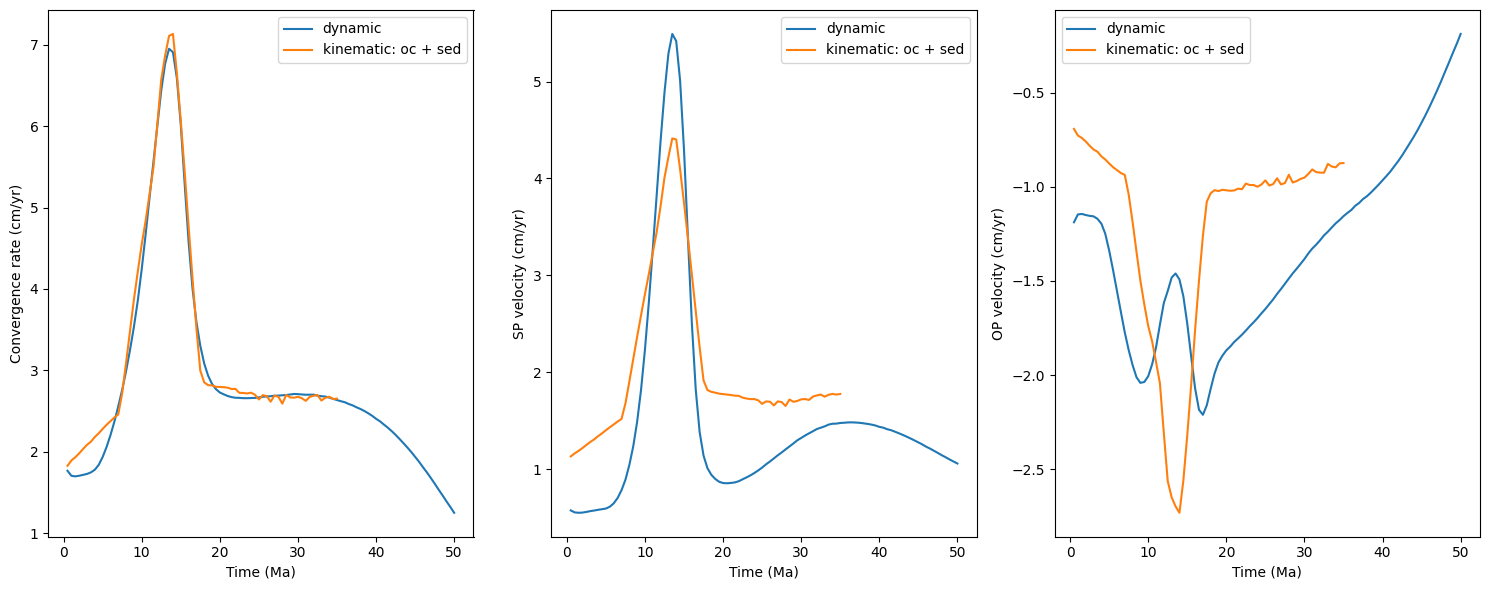

In [4]:
ax, fig = plt.subplots(1, 3, figsize=(15, 6))
fig[0].plot(dyn.time/1e6, dyn.conv_rate, label='dynamic')
fig[0].plot(kin.time/1e6, kin.conv_rate, label='kinematic: oc + sed')
# fig[0].plot(kin_oce.time/1e6, kin_oce.conv_rate, label='kinematic: ETH plasticity')
fig[0].set_xlabel('Time (Ma)')
fig[0].set_ylabel('Convergence rate (cm/yr)')
fig[0].legend()

fig[1].plot(dyn.time/1e6, dyn.SP, label='dynamic')
fig[1].plot(kin.time/1e6, kin.SP, label='kinematic: oc + sed')
# fig[1].plot(kin_oce.time/1e6, kin_oce.SP, label='kinematic: ETH plasticity')
fig[1].set_xlabel('Time (Ma)')
fig[1].set_ylabel('SP velocity (cm/yr)')
fig[1].legend()

fig[2].plot(dyn.time/1e6, dyn.OP, label='dynamic')
fig[2].plot(kin.time/1e6, kin.OP, label='kinematic: oc + sed')
# fig[2].plot(kin_oce.time/1e6, kin_oce.OP, label='kinematic: ETH plasticity')
fig[2].set_xlabel('Time (Ma)')
fig[2].set_ylabel('OP velocity (cm/yr)')
fig[2].legend()


ax.tight_layout()

plt.savefig(f"/home/vturino/PhD/projects/exhumation/plots/single_models/{kin_name}/compare_conv_rate.png", dpi = 1000)

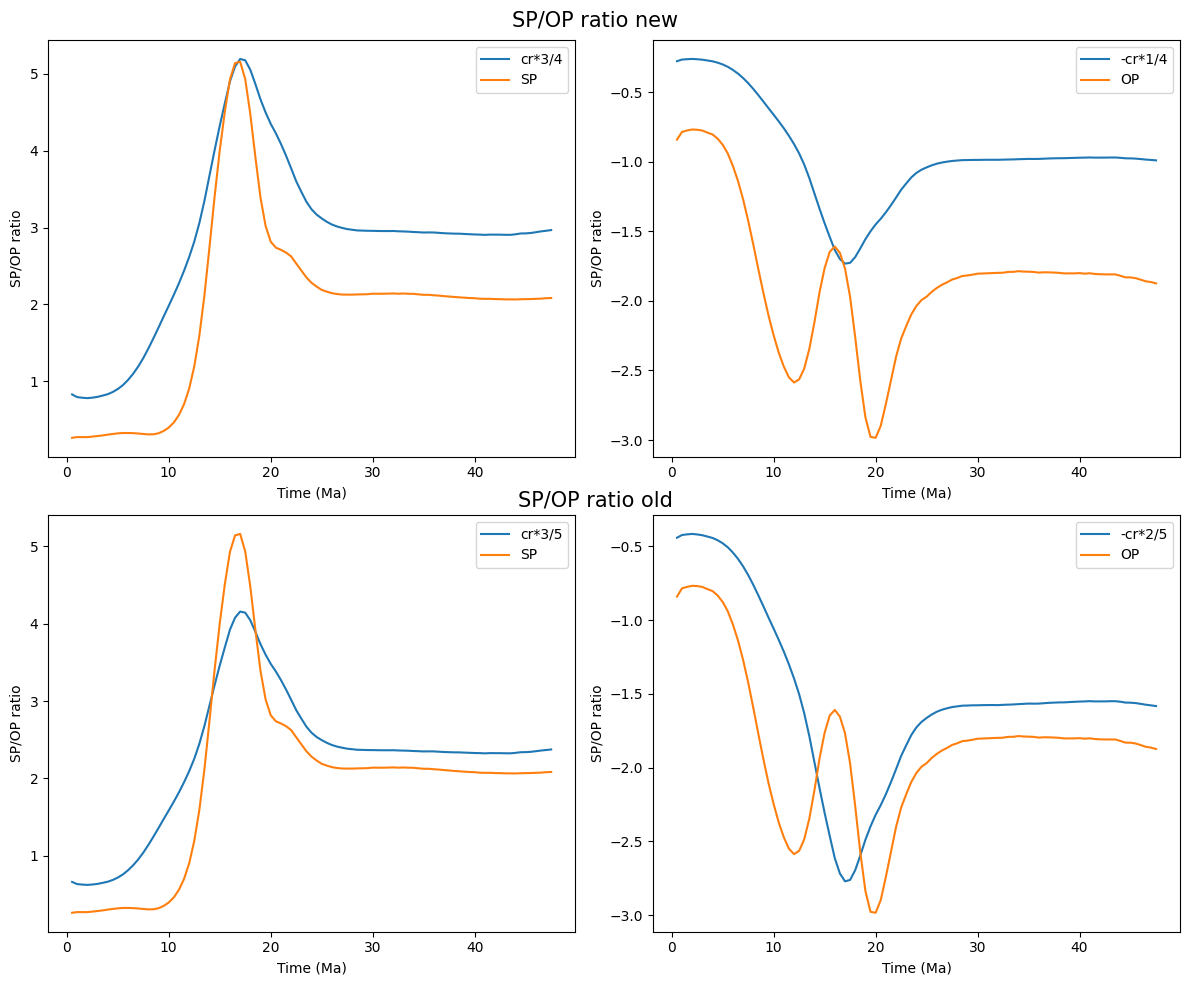

In [10]:
#plot SP/OP ratio
fig, ax = plt.subplots(2,2, figsize=(12, 10))

fig.suptitle('SP/OP ratio new', fontsize=15, color='black')
ax[0, 0].plot(dyn.time/1e6, dyn.conv_rate*3/4, label='cr*3/4')
ax[0, 0].plot(dyn.time/1e6, dyn.SP, label='SP')
ax[0, 0].set_xlabel('Time (Ma)')
ax[0, 0].set_ylabel('SP/OP ratio')
ax[0, 0].legend()

ax[0, 1].plot(dyn.time/1e6, -dyn.conv_rate*1/4, label='-cr*1/4')
ax[0, 1].plot(dyn.time/1e6, dyn.OP, label='OP')
ax[0, 1].set_xlabel('Time (Ma)')
ax[0, 1].set_ylabel('SP/OP ratio')
ax[0, 1].legend()

# ax[1, 0].set_title('SP/OP ratio old')
plt.figtext(0.5, 0.49, 'SP/OP ratio old', ha='center', va='center', fontsize=15, color='black')
ax[1, 0].plot(dyn.time/1e6, dyn.conv_rate*0.6, label='cr*3/5')
ax[1, 0].plot(dyn.time/1e6, dyn.SP, label='SP')
ax[1, 0].set_xlabel('Time (Ma)')
ax[1, 0].set_ylabel('SP/OP ratio')
ax[1, 0].legend()

ax[1, 1].plot(dyn.time/1e6, -dyn.conv_rate*0.4, label='-cr*2/5')
ax[1, 1].plot(dyn.time/1e6, dyn.OP, label='OP')
ax[1, 1].set_xlabel('Time (Ma)')
ax[1, 1].set_ylabel('SP/OP ratio')
ax[1, 1].legend()

fig.tight_layout()

plt.savefig(f"/home/vturino/PhD/projects/exhumation/plots/single_models/{kin_name}/compare_SP_OP_ratio.png", dpi=1000)

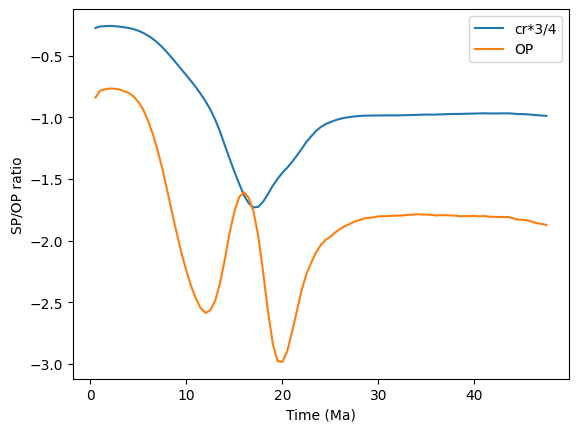

In [8]:
fig, ax = plt.subplots()
ax.plot(dyn.time/1e6, -dyn.conv_rate*1/4, label='cr*3/4')
ax.plot(dyn.time/1e6, dyn.OP, label='OP')
ax.set_xlabel('Time (Ma)')
ax.set_ylabel('SP/OP ratio')
ax.legend()

In [19]:
import numpy as np
import pandas as pd
bp = 4
t = np.zeros(bp+2)
t[-1] = 50.e6
t[0] = 0.
time = np.zeros((bp+1, 20))

coeff = pd.DataFrame(columns=["a", "b", "t"])
coeff["a"] = [1.00756e-09, 7.52792e-09, -1.11833e-08, 0, -2.281467e-9]
coeff["b"] = [0.020515, -0.026251, 0.231524, 0.034222, 0.114073]
coeff["t"] = [7.2e6, 13.8e6, 17.8e6, 34.5e6, 50.e6]

for n in range(bp+1):
    t[n+1] = coeff["t"].iloc[n]
for n in range(bp+1):
    time[n] = np.linspace(t[n], t[n+1], 20)


v = np.zeros((bp+1, 20))
for n in range(bp+1):
    v[n] = coeff["a"].iloc[n]*time[n]+coeff["b"].iloc[n]

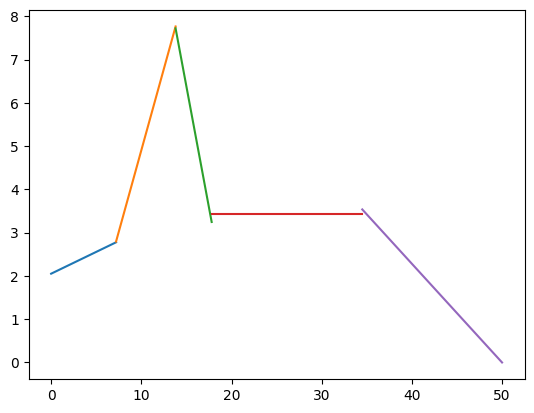

In [20]:
import matplotlib.pyplot as plt

for i in range(bp+1):
    plt.plot(time[i]/1e6, v[i]*1e2, label=f"segment {i+1}")
# plt.plot(time[i]/1e6, v_shift[i]*1e2, label=f"segment {i+1} shifted")